Try out a linear model

Surprisingly it does really well with very litele feature engineering. The key point is to log_transform the numeric variables since most of them are skewed

importação das bibliotecas

In [1]:
#!pip install seaborn
#!pip install scipy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'retina' # set 'png' here when working on notebook
%matplotlib inline

In [3]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Juntou pata pré-processamento nos dados de treino e nos dados de teste

In [6]:
all_data = pd.concat(
                        (
                            train.loc[:,'MSSubClass':'SaleCondition'],
                            test.loc[:,'MSSubClass':'SaleCondition']
                        )
                    )

In [7]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Data preprocessing
We're not going to do anything fancy here:
    First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal.
    Create Dummy variables for the categorical features
    Replace the numeric missing values (NaN's) with the mean of their respective columns

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

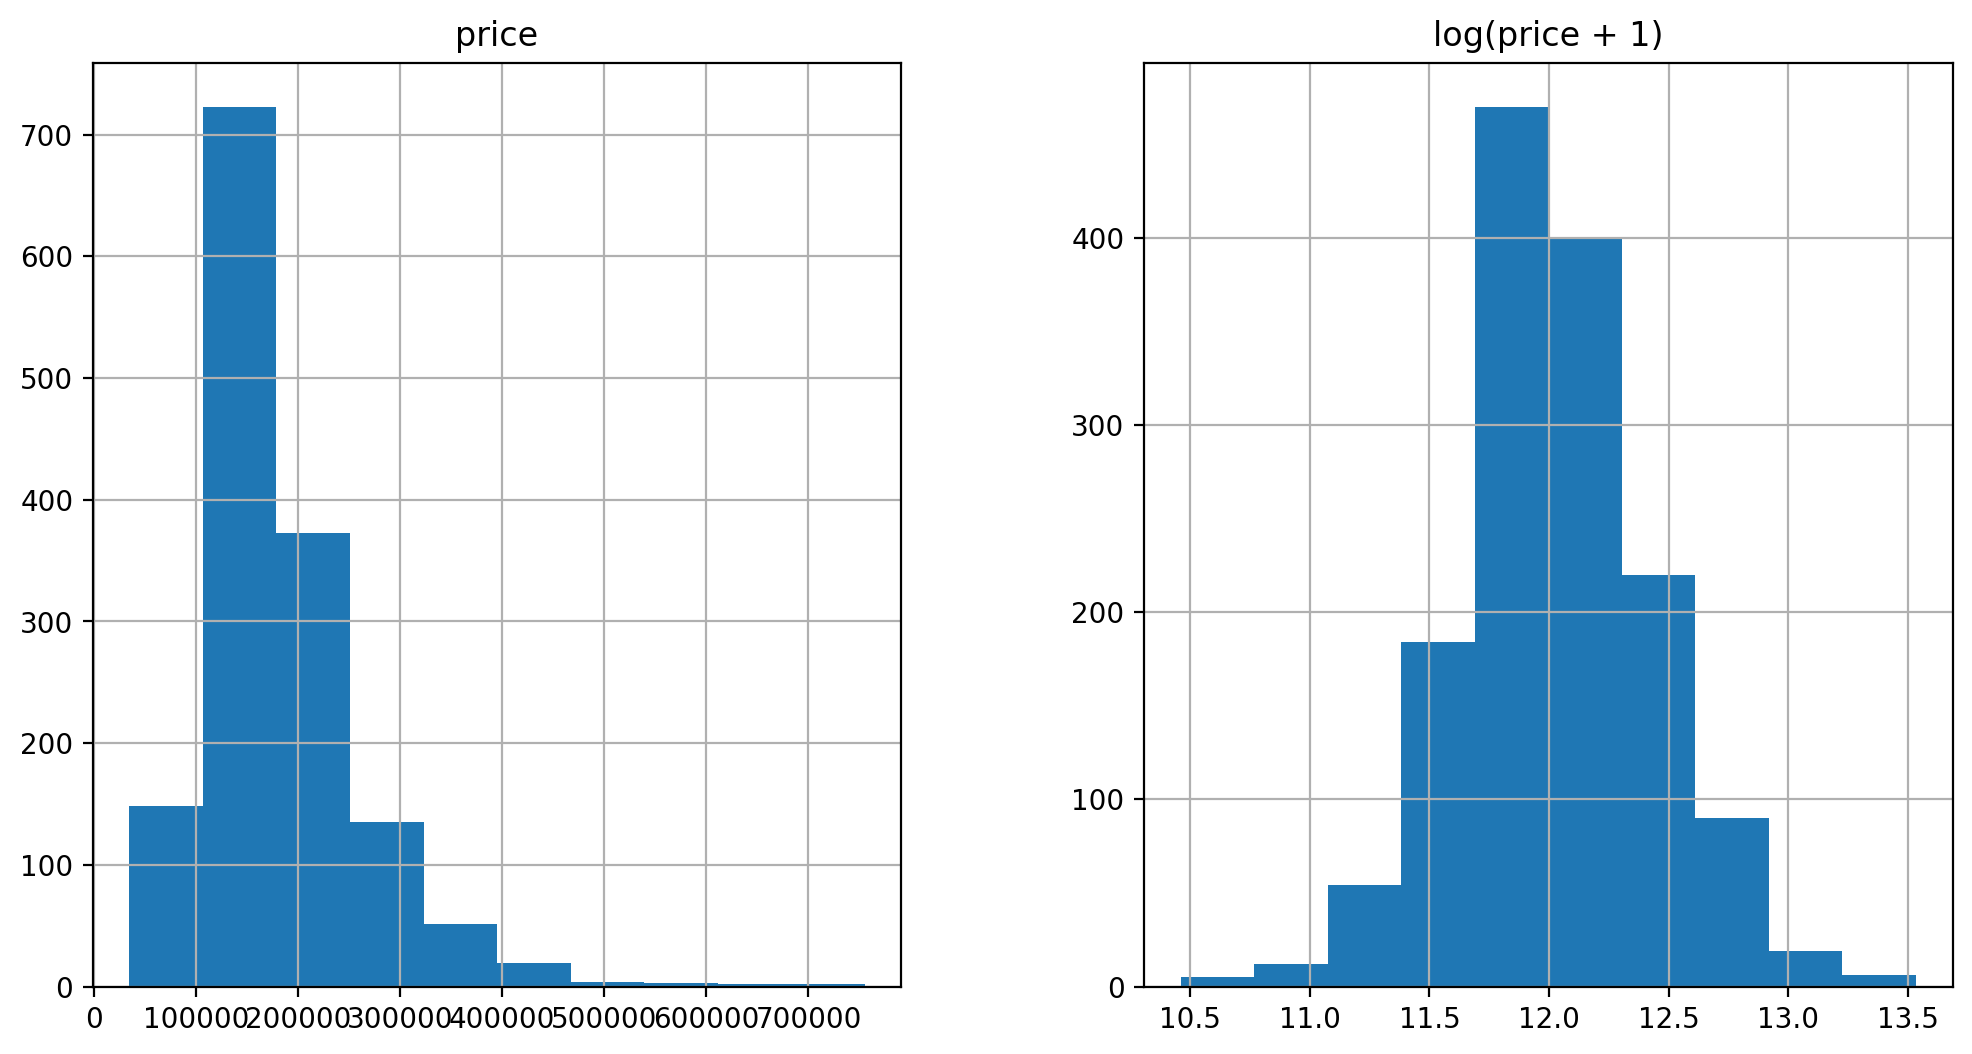

In [8]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame(
    {
        "price" : train["SalePrice"], 
         "log(price + 1)" : np.log1p(train["SalePrice"])
    }
)
prices.hist()

In [9]:
# log transform the target
train["SalePrice"] = np.log1p(train["SalePrice"])

In [10]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) # compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [11]:
all_data = pd.get_dummies(all_data)

In [12]:
#filling NA's with the mean of the column
all_data = all_data.fillna(all_data.mean())

In [13]:
# creating matrices for sklearn
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

Models
Now we are going to use regularized linear regression models from scikit learn module. I'm going to try both l_1 (lasso) and l_2 (Ridge) regularization. I'll also define a function that returns the cross-validation rmse error we can evaluate our models and pick the best tuning par.

In [14]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring = "neg_mean_squared_error", cv = 5 ))
    return (rmse)

In [15]:
model_rodge = Ridge()

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexibe our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

In [16]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv (Ridge (alpha = alpha)).mean() for alpha in alphas]

Text(0, 0.5, 'rmse')

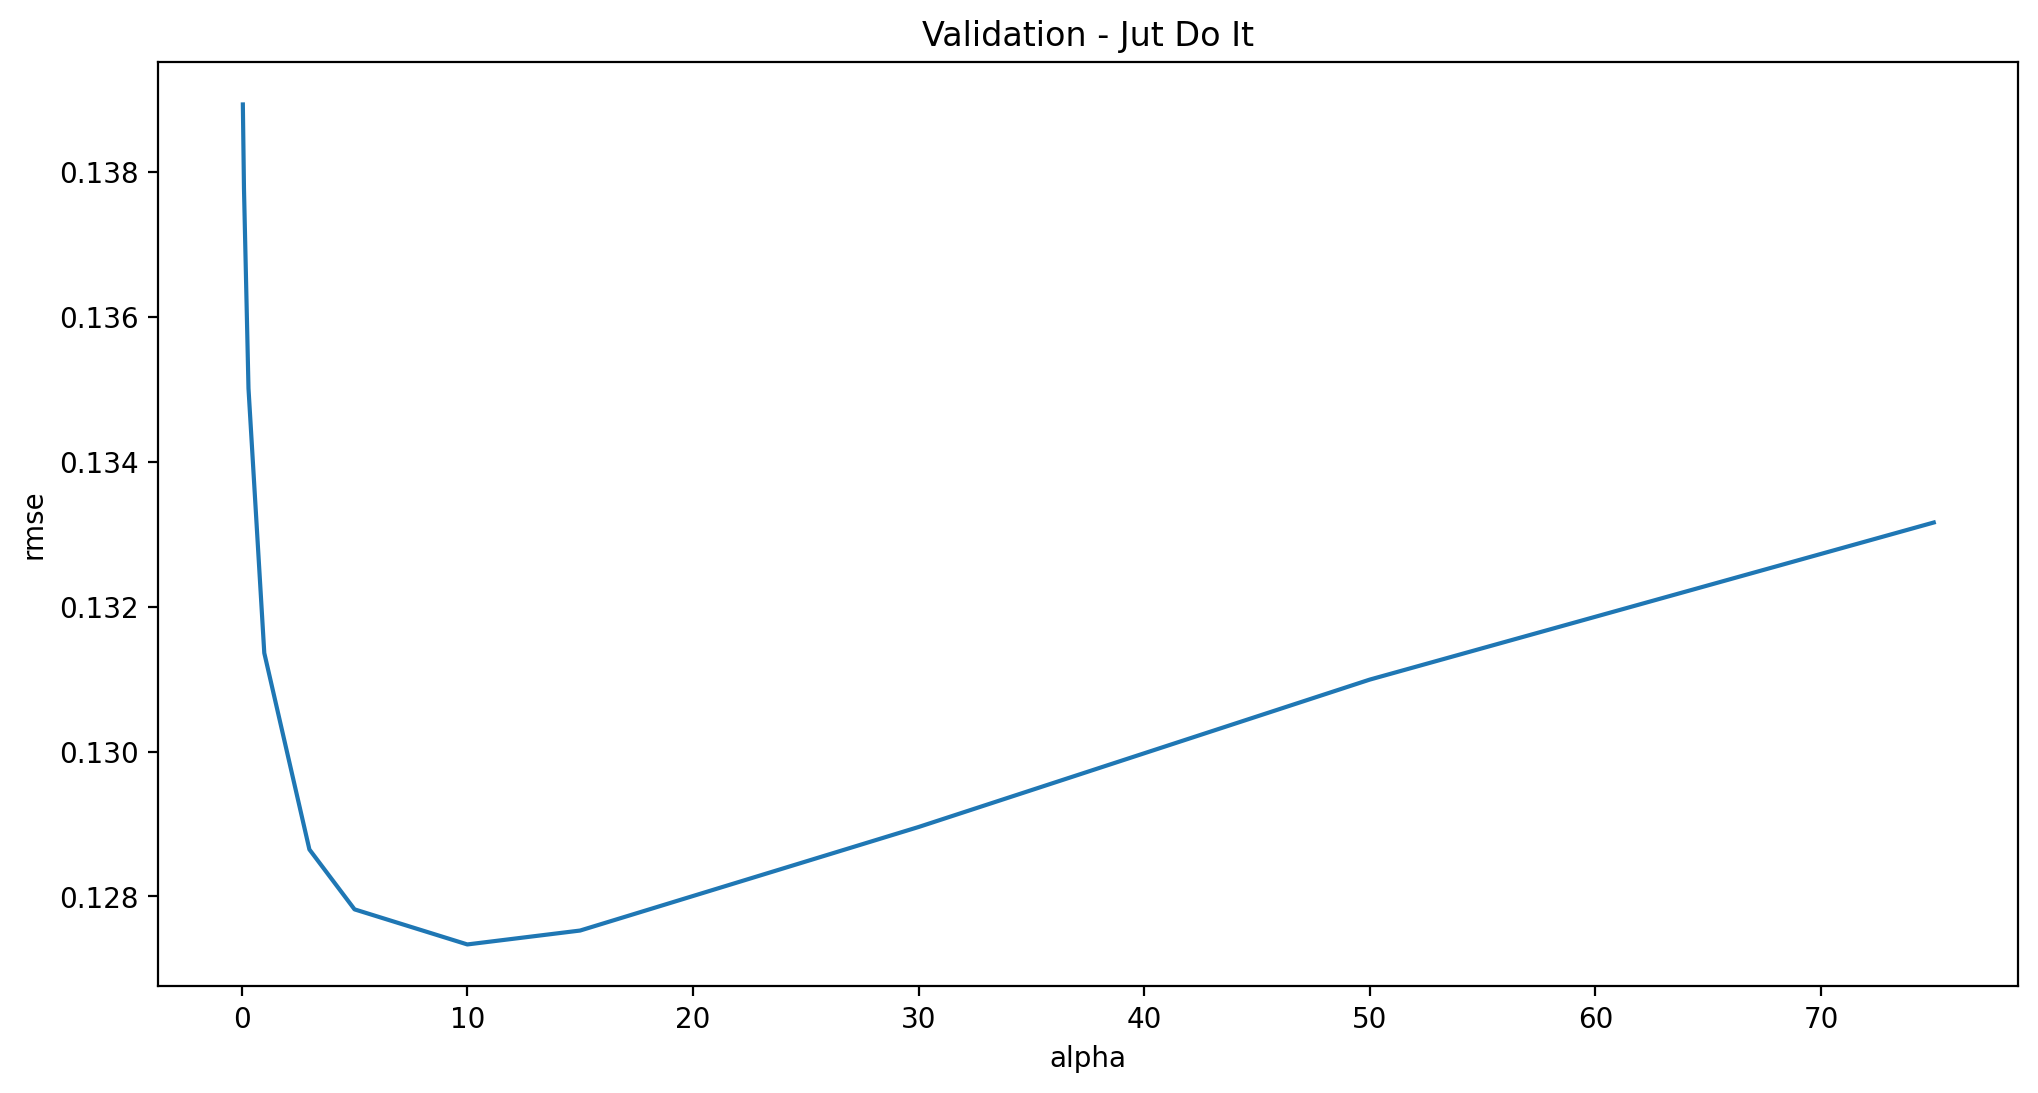

In [17]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Jut Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexibe (alpha small) the model begins to overfit. A value of alpha = 10 is about right based on the plot abova.

In [18]:
cv_ridge.min()

0.12733734668670751

So for the Ridge regression we get a rmsle of about 0.127
Let's try out the Lasso model. We will do a slightly different approach here and use the buil in Lasso CV to figure out the best alpha for us. For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge

In [19]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [20]:
rmse_cv(model_lasso).mean()

0.1225673588504814

Nice! The lasso performs even better so we'll just use this one predict on the test set. Another neat thing about the Lasso is that is tt dows feature selection for you - setting coeficientes of feature it deems unimportant to zero. Let's take a look at the coefficients.

In [21]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [22]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef ==0)) + " variables") 

Lasso picked 110 variables and eliminated the other 178 variables


Googd job Lasso. One thing to note here however is that the features selected ae not necessarily the "correct" ones - especialy since there are a lot of collinear features in this dataset. One idea to try here is run Lasso a few times on bootstrapped samples and see how stable the feature selection is.

We can also take a look directly at what the most importatn coeffcicients are:

In [23]:
imp_coef = pd.concat([coef.sort_values().head(10),
                      coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

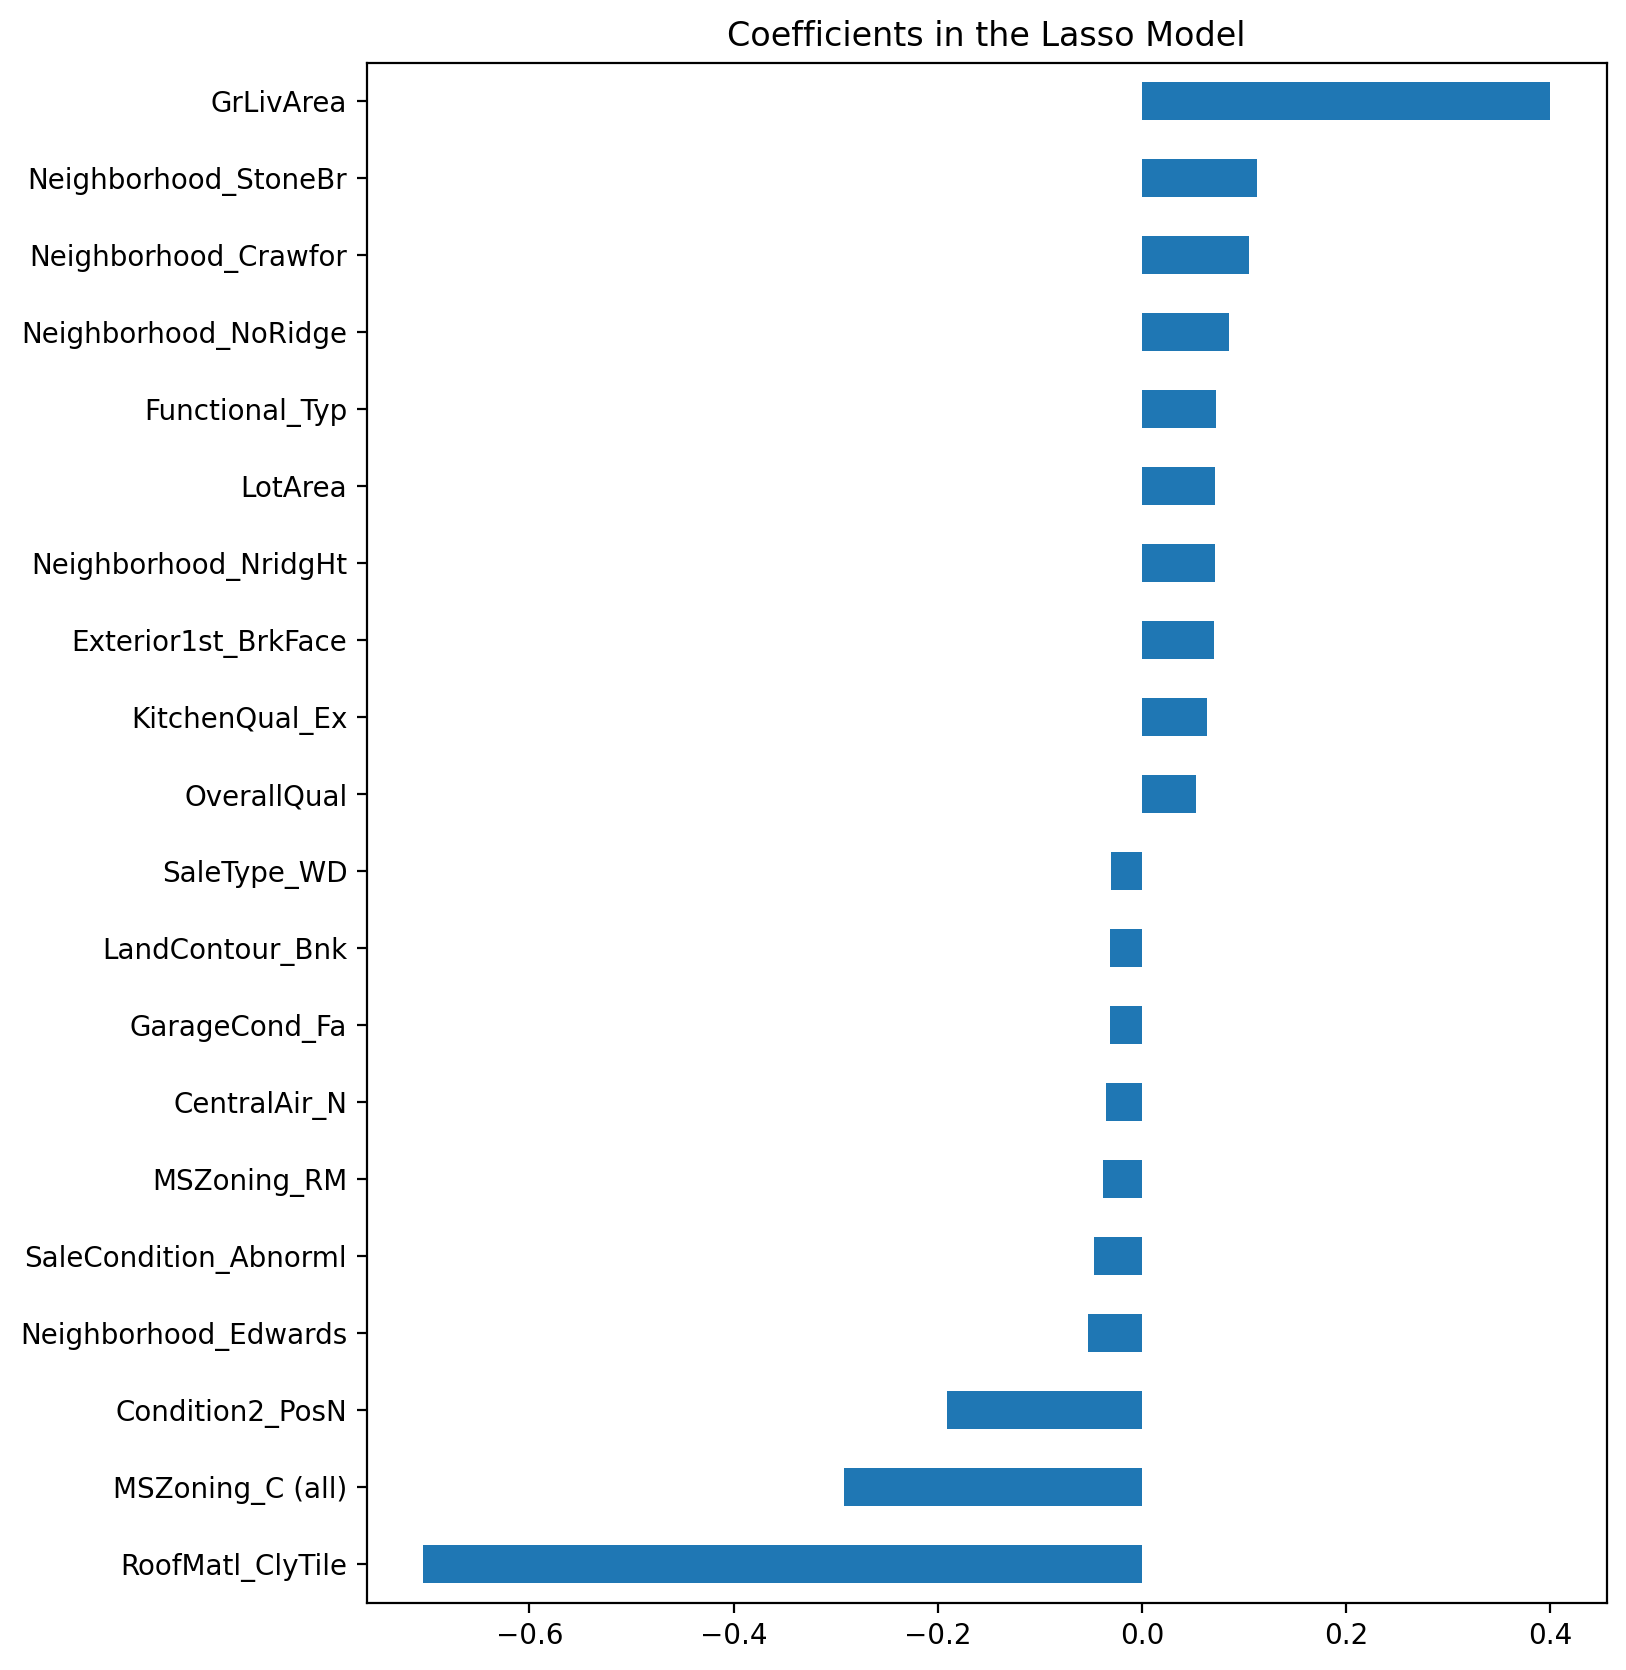

In [24]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

The most important positive feature is GrLivArea - the above ground area by area square feet. This definitely sense. Then a few other location and quality features contributed positively. Some of the negative features make less sense and would be worth looking into more - it seems like they might come from unbaleced categorical variables

Also note that unlike the feature importance you'd get from a random forest these are actual coeefficients in your model - so you can say precisely why the predicted price is what is. The only issue here is that we log_transformed both the target and the numeric features so the actual magnitudes are a bit hard to interpret.

<AxesSubplot:xlabel='preds', ylabel='residuals'>

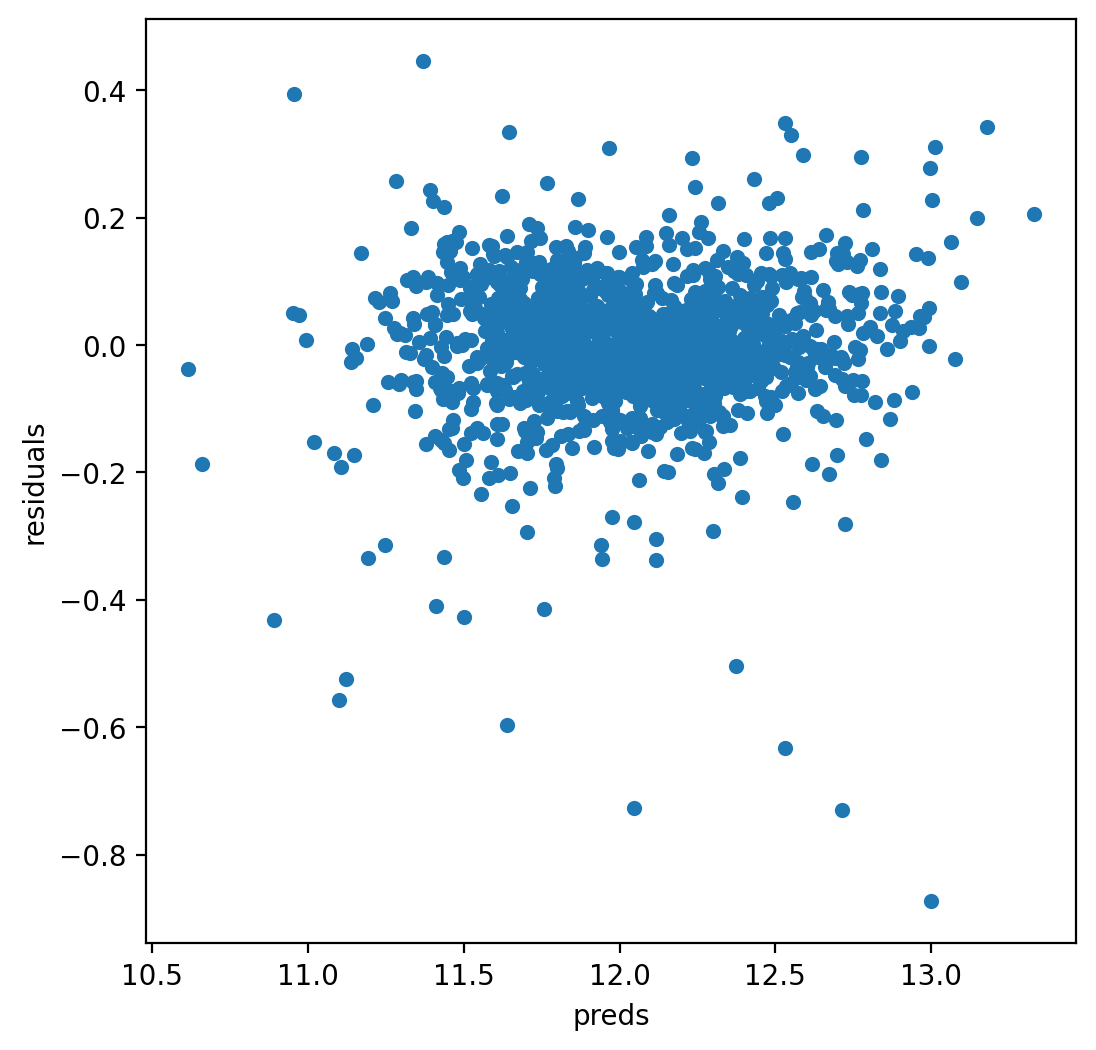

In [25]:
# lets look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true": y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals", kind = "scatter")

The residual plot looks pretty good. To wrap it up let's predict on the test set and submit on the leaderboard:

Adding an xgboost model:

Let's add an xgboost model to our linear model to see if we can improve our score:

In [26]:
#!pip install xgboost
import xgboost as xgb

In [27]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)

<AxesSubplot:>

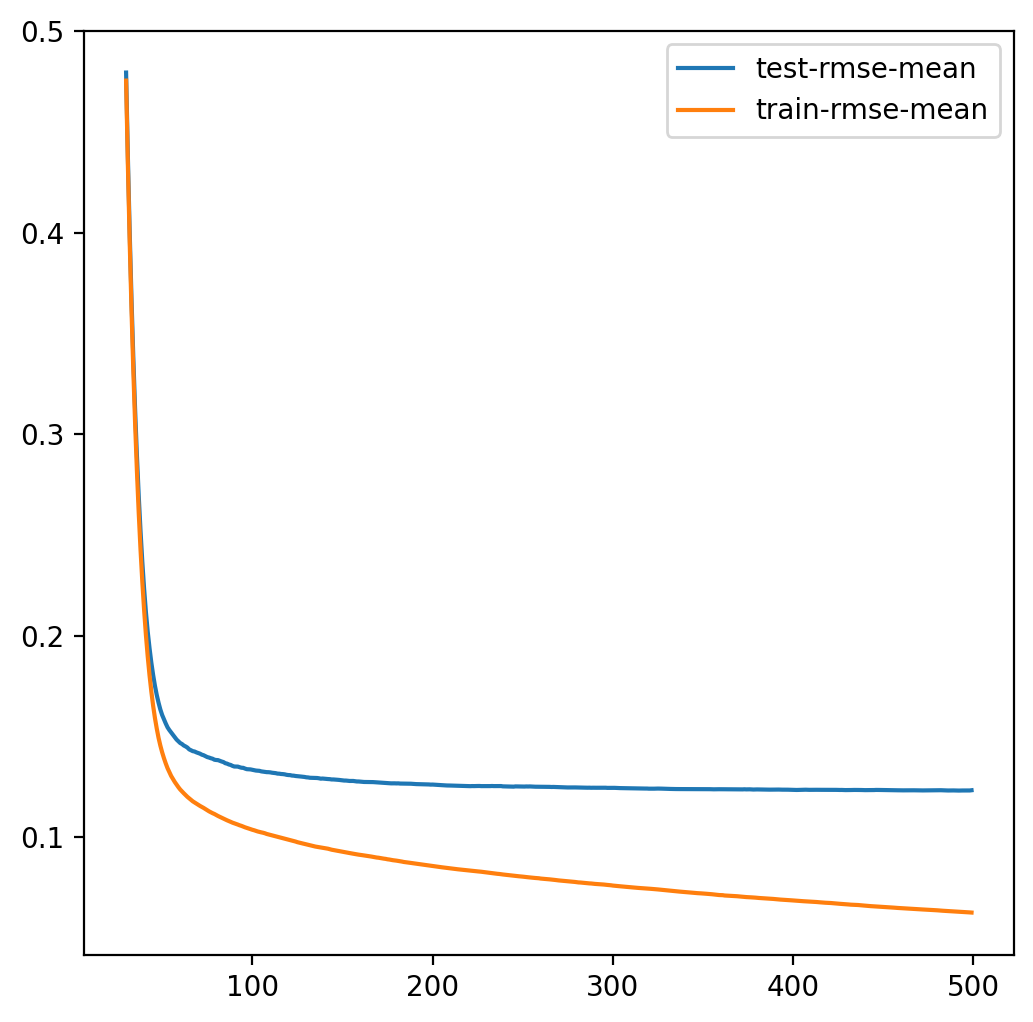

In [28]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [29]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=360, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [30]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

<AxesSubplot:xlabel='xgb', ylabel='lasso'>

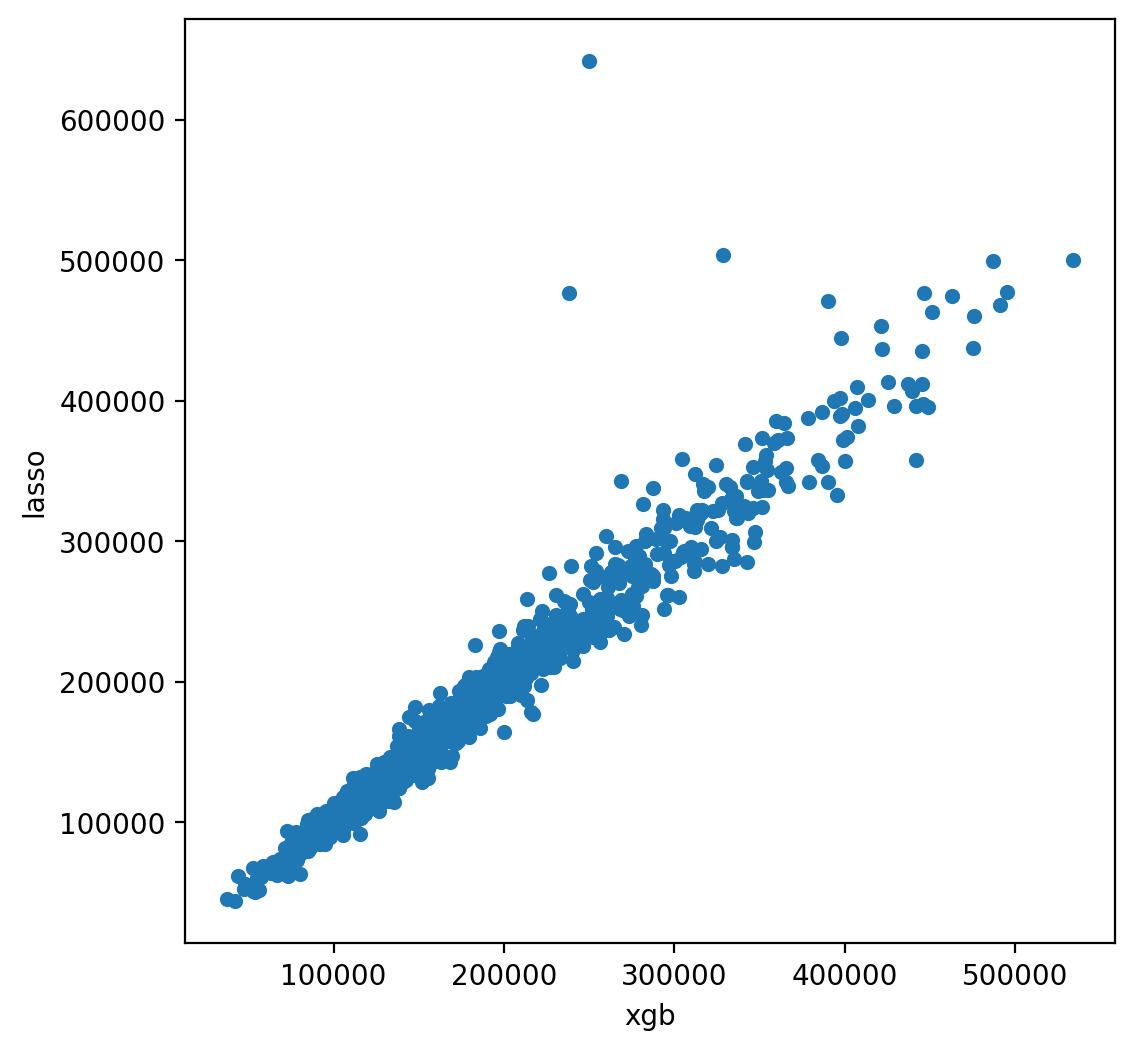

In [31]:
predictions = pd.DataFrame({"xgb": xgb_preds, "lasso":lasso_preds})
predictions.plot(x= "xgb", y = "lasso", kind = "scatter")

In [34]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [36]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)

Tryng out keras?
Feedfoward Neural Nets doesn't seem to work well at all... I wonder why

In [38]:
!pip install tensorflow

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [40]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend

In [41]:
X_train = StandardScaler().fit_transform(X_train)

In [42]:
X_tr, X_vl, y_tr, y_val = train_test_split(X_train, y, random_state =3)

In [43]:
X_tr.shape

(1095, 288)

In [44]:
X_tr

array([[ 1.00573733,  0.68066137, -0.46001991, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.12520184,  0.60296111,  0.03113183, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.12520184, -0.02865265, -0.74027492, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 0.16426234, -0.87075036, -0.81954431, ..., -0.11785113,
        -2.13834494, -0.30599503],
       [ 0.92361154, -0.30038284, -0.44275864, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.83656519,  1.98505948,  0.46455838, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [48]:
model = Sequential()
#model.add(Dense(256, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(1, input_dim = X_train.shape[1]))

model.compile(loss = "mse", optimizer = "adam")

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 289       
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [52]:
hist = model.fit(X_tr, y_tr, validation_data = (X_vl, y_val))

35/35 [==============================] - 1s 5ms/step - loss: 146.1273 - val_loss: 148.1330


<AxesSubplot:>

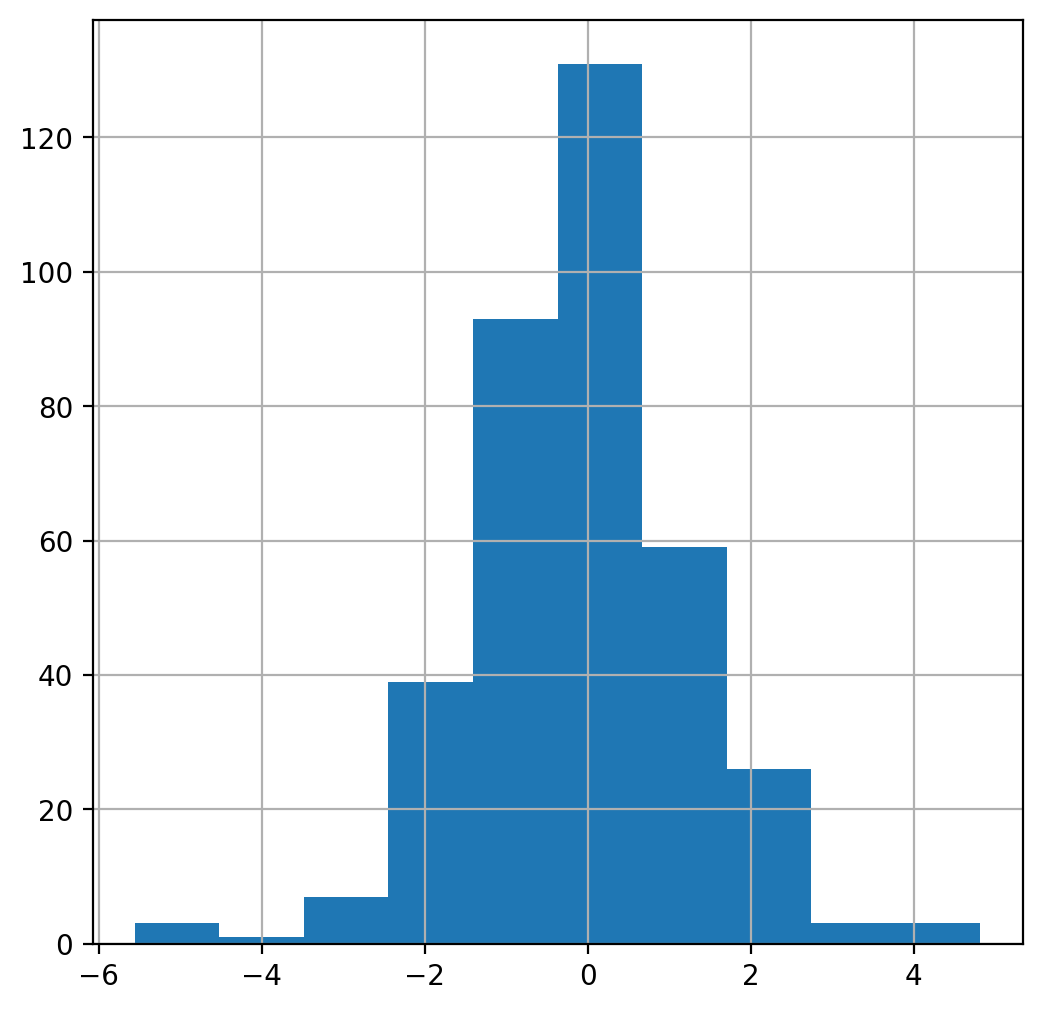

In [53]:
pd.Series(model.predict(X_vl)[:,0]).hist()

In [ ]:
om sklearn.model_selection import cross_val_score
# treina com hiperparametro mais adequado
model = MLPClassifier(16)
#
val_scores = cross_val_score(model, x, y, cv=5)
print('Acurácia nos k-folds:', val_scores)
print('Média: {:.2} | Desvio: {:.2}'.format(np.mean(val_scores), np.std(val_scores)))

In [ ]:
a validação cruzada cada instância dos dados de treino faz parte do conjunto de validação ao menos uma vez, note que só é preciso dividir o conjunto original uma única vez em treino / teste pois a função cross_val_score(modelo, train_x, train_y, cv) realiza internamente a a divisão dos folds de validação.

Para comparar modelos diferentes utilizando validação cruzada podemos prosseguir conforme abaixo:

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# conjunto de modelos
models = [MLPClassifier(16), LinearRegression(),
          SVC(),DecisionTreeClassifier()]
# score de cada modelo
models_scores = []
for model in models:
    val_scores = cross_val_score(model, train_x, train_y, cv=5)
    nome_modelo = type(model).__name__ # somente para exibição
    print('Modelo: {} | Média: {:.2} | Desvio: {:.2}'.format(nome_modelo,
                                    np.mean(val_scores), np.std(val_scores))